In [1]:
import pandas as pd
import sys
import numpy as np
import time
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
# Read AMD dataframe
df = pd.read_csv("./independendt projecct/AMD.csv")
df = df.iloc[:-1,]

In [3]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1251,2019-09-24,30.540001,30.750000,29.290001,29.520000,29.520000,72963000
1252,2019-09-25,29.480000,29.650000,28.549999,29.540001,29.540001,58234800
1253,2019-09-26,29.670000,29.770000,29.000000,29.469999,29.469999,40745400
1254,2019-09-27,29.170000,29.770000,28.350000,28.719999,28.719999,54091100
1255,2019-09-30,28.889999,29.049999,28.360001,28.990000,28.990000,37295600


In [4]:
close_amd_byday = df.values[:,4]
length = close_amd_byday.shape[0]

In [5]:
close_amd_byday.shape

(1256,)

# Process Data

In [6]:
import numpy as np

In [7]:
close_amd_byday_float = close_amd_byday.astype('float')

In [8]:
close_amd_byday_float = close_amd_byday_float.T
close_amd_byday_float.shape

(1256,)

# Visualize

In [9]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

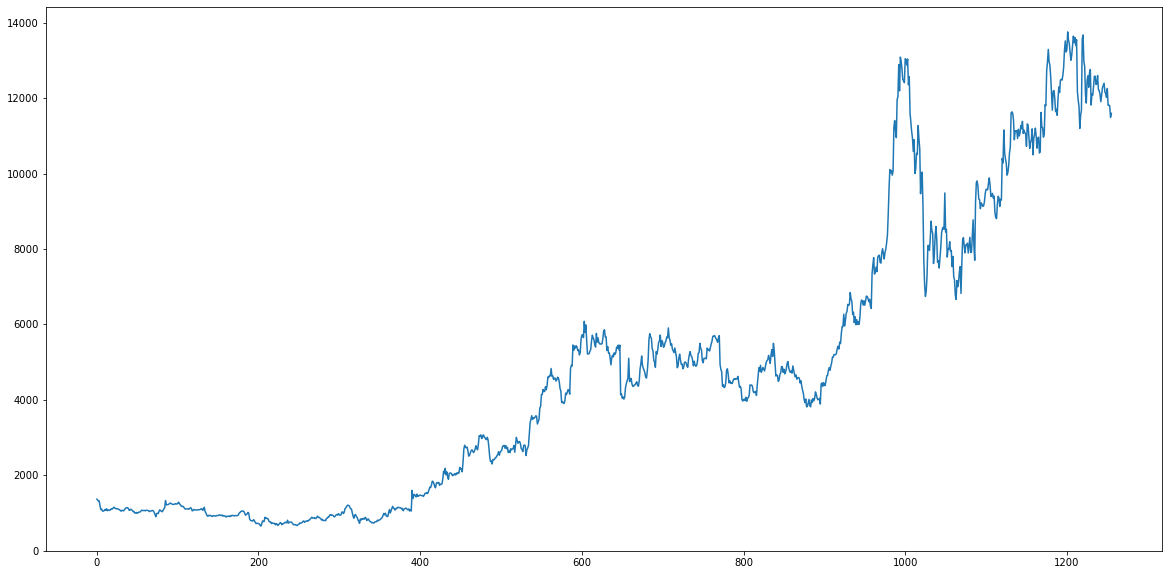

In [10]:
plt.plot(close_amd_byday_float*400) # Magnify for comparison
# plt.plot(cpi_byday_float*10000-200000)
# plt.plot(euro_byday_float*500)
plt.show()

# Fit model

In [11]:
length = 1200

In [12]:
val1 = np.matrix(close_amd_byday_float).T
val1.shape

(1256, 1)

## NN w/ Cross Validation

In [13]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [14]:
# Compute MAE
def compute_error(y_hat, y):
    # mean absolute error
    return np.abs(y_hat - y).mean()

In [15]:
dataset = val1

train = dataset[0:1000,:]
valid = dataset[1000:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)



In [16]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))



In [17]:
x_train.shape

(940, 60, 1)

In [18]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

940/940 - 3s - loss: 0.0016


In [22]:
#predicting 246 values, using past 60 from the train data
new_data = val1.copy()
inputs = new_data[len(new_data) - len(valid) - 60:]
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

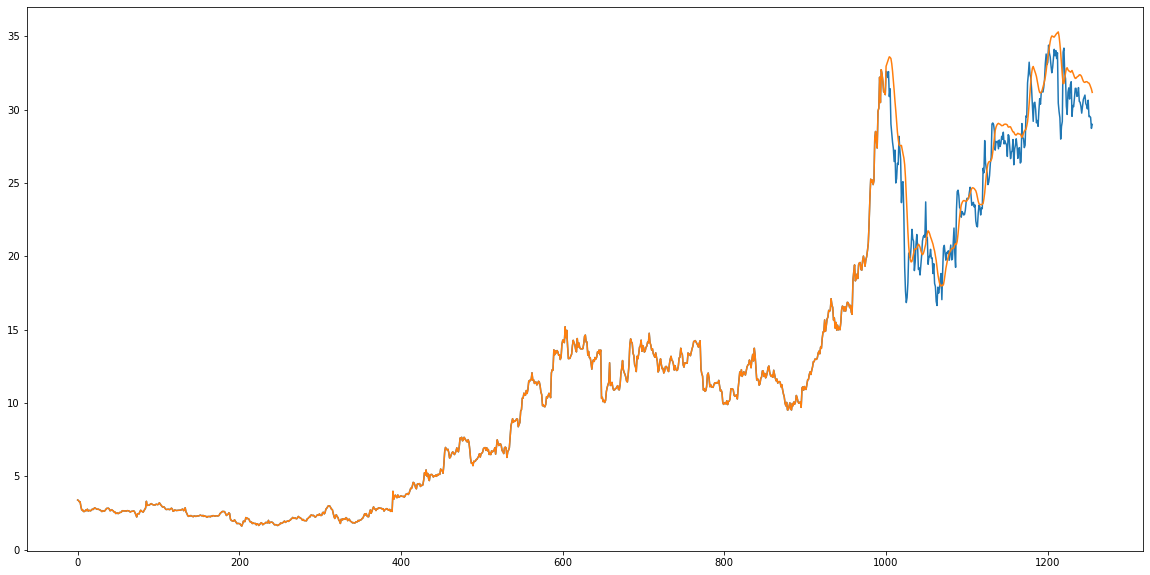

In [24]:
#for plotting
label = val1
pred = np.vstack((val1[:1000], closing_price))
plt.plot(label)
plt.plot(pred)

In [25]:
compute_error(closing_price, valid)


1.55713585102129